### Determine the optimal K number

* This notebook determines the optimal number of K-Means algorithm using Average silhouette method
* Three data processing approaches: 
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach I. 514 features were pre-selected out of the 1063 features. All variables have been transformed into numerical values using low rank representation method, the reduced dimension matrix is used here to determine optimal K.
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach II. 514 features were selected out of the 1063 features. Drop all the categorical values and impute the numerical values with means, the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data.
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach III. Drop all the categorical values and impute the numerical values with means, use PCA to reduce the original 1063 dimensions.  the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data.
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach IV 514 features were selected out of the 1063 features. Then use LASSO and PCA to contidue reduce dimension to 44 variables (all of them turned out to be numerical variables). Impute NA with means.
* All four approaches show consistent results of optimal K of 8.

Reference:  http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [31]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.decomposition import PCA
%matplotlib inline

#### Approach I. All variables have been transformed into numerical values using low rank representation method, the reduced dimension matrix is used here to determine optimal K.

In [8]:
df = pd.read_csv('/mnt/UW/outputDataset/lowrank_rep.csv.gz')

In [9]:
X = StandardScaler().fit_transform(df)

In [12]:
import time
start = time.time()

# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:
#     # Create a subplot with 1 row and 2 columns
#     fig, ax = plt.subplots(1, 1)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 
#     ax.set_xlim([-1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.spectral(float(i) / n_clusters)
#         ax.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax.set_title("The silhouette plot for the various clusters.")
#     ax.set_xlabel("The silhouette coefficient values")
#     ax.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax.set_yticks([])  # Clear the yaxis labels / ticks
#     ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#     plt.show()
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

For n_clusters = 2 The average silhouette_score is : 0.072717654796498
For n_clusters = 3 The average silhouette_score is : 0.04089267134109773
For n_clusters = 4 The average silhouette_score is : 0.04670453757292139
For n_clusters = 5 The average silhouette_score is : 0.05654648359745715
For n_clusters = 6 The average silhouette_score is : 0.05985700409839573
For n_clusters = 7 The average silhouette_score is : 0.05695582485318368
For n_clusters = 8 The average silhouette_score is : 0.05848739013857629
For n_clusters = 9 The average silhouette_score is : 0.058007978360157274
For n_clusters = 10 The average silhouette_score is : 0.06293691154720871
For n_clusters = 11 The average silhouette_score is : 0.05311023349264474
For n_clusters = 12 The average silhouette_score is : 0.04936113128260946
For n_clusters = 13 The average silhouette_score is : 0.05503317247352436
03:23:21.53


In [17]:
score = [0.04089267134109773, 0.04670453757292139, 0.05654648359745715,0.05985700409839573,0.05695582485318368,0.05848739013857629,0.058007978360157274,0.06293691154720871,0.05311023349264474,0.04936113128260946,0.05503317247352436]
k_range = range(3,14)

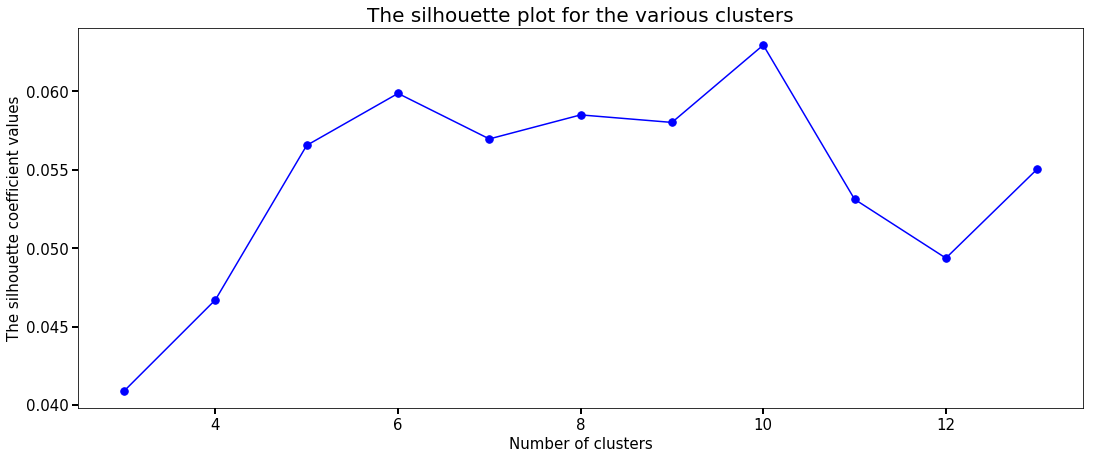

In [18]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

#### Approach II. Drop all the categorical values and impute the numerical values with means, the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data

In [19]:
# Use a smaller data set to save time
df1 = pd.read_csv('PHBsample14_sss.csv', low_memory=False)
df2 = pd.read_csv('PHBsample15_sss.csv', low_memory=False)
df3 = pd.read_csv('PHBsample16_sss.csv', low_memory=False)
# drop the column resulted from sampling of the original data set
df1.drop('Unnamed: 0', axis=1, inplace=True)
df2.drop('Unnamed: 0', axis=1, inplace=True)
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
selected_variable = pd.read_csv('selectedVariables.csv')
selected_variable.drop('Unnamed: 0', axis=1, inplace=True)
df1_1 = df1[df1.columns.intersection(selected_variable.columns)]
df2_1 = df2[df2.columns.intersection(selected_variable.columns)]
df3_1 = df3[df3.columns.intersection(selected_variable.columns)]

In [21]:
# Drop all the categoricald data for now.
df1_2 = df1_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df1_3 = df1_2.fillna(df1_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df1_3)

For n_clusters = 3 The average silhouette_score is : 0.041282113612908886


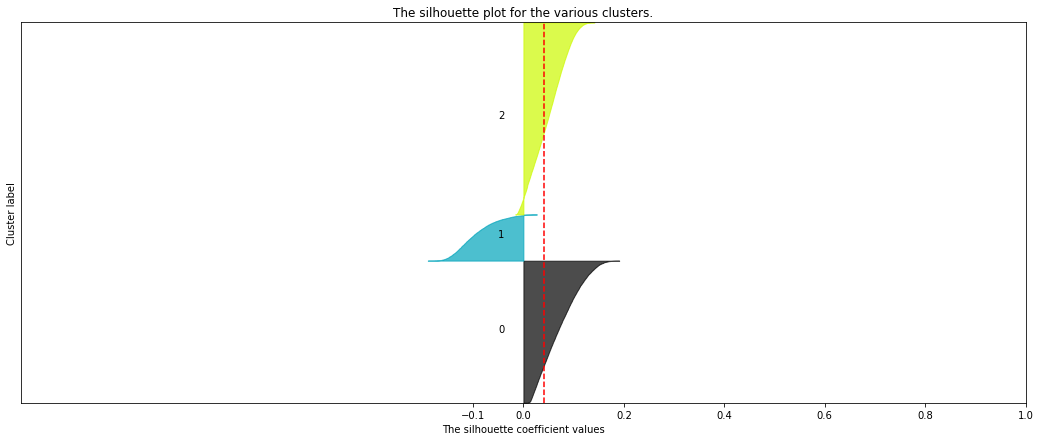

For n_clusters = 4 The average silhouette_score is : 0.012838457853413374


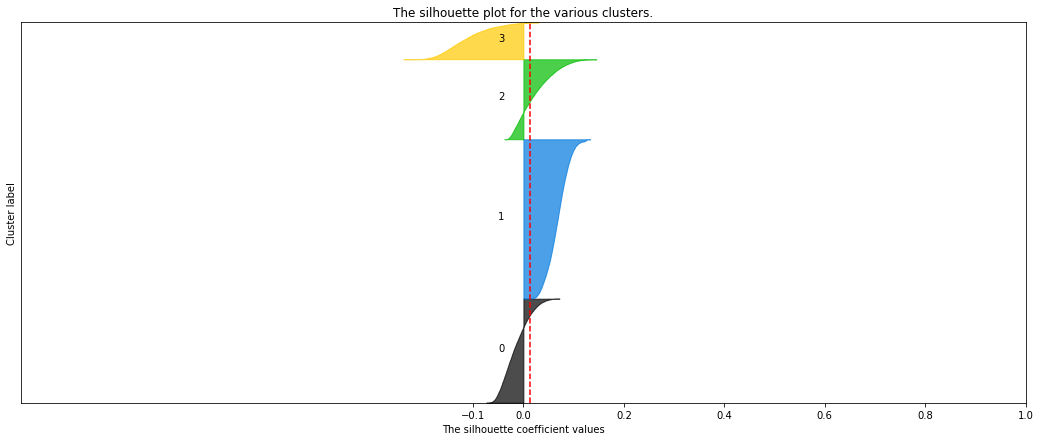

For n_clusters = 5 The average silhouette_score is : 0.010474104017038672


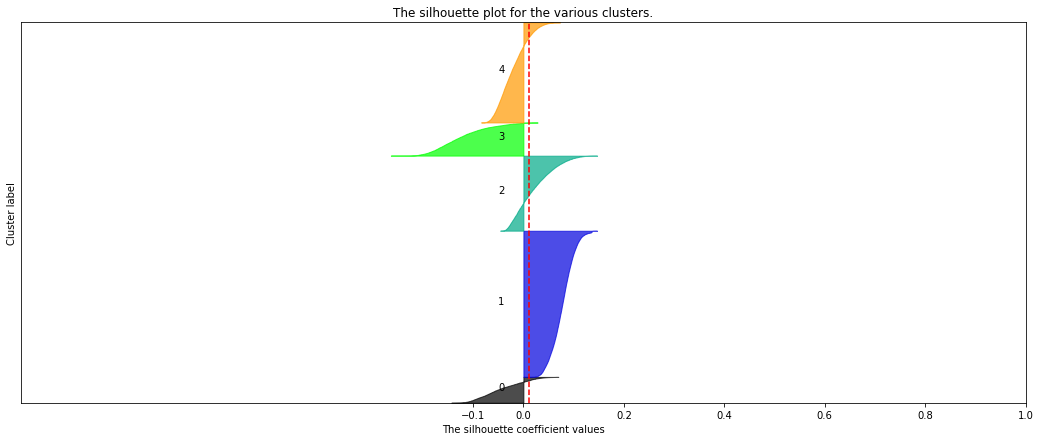

For n_clusters = 6 The average silhouette_score is : 0.009240838072112532


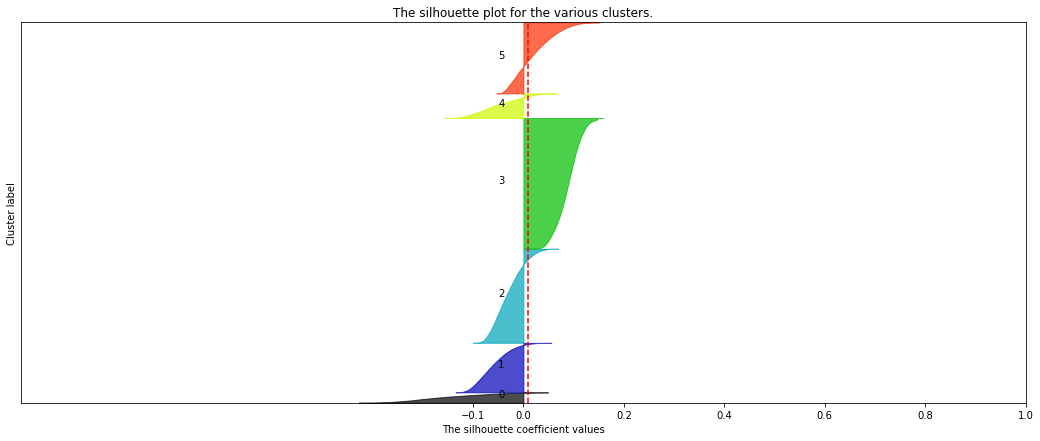

For n_clusters = 7 The average silhouette_score is : 0.00803928875280132


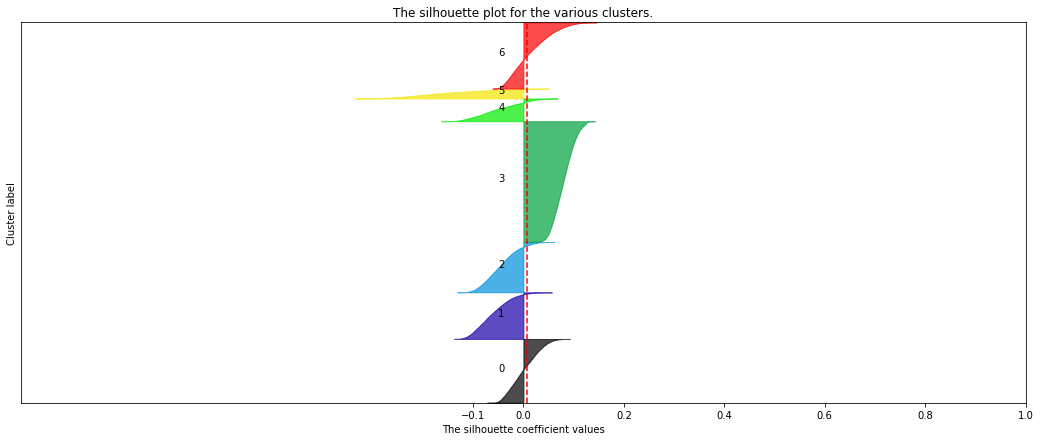

For n_clusters = 8 The average silhouette_score is : 0.006840143568309827


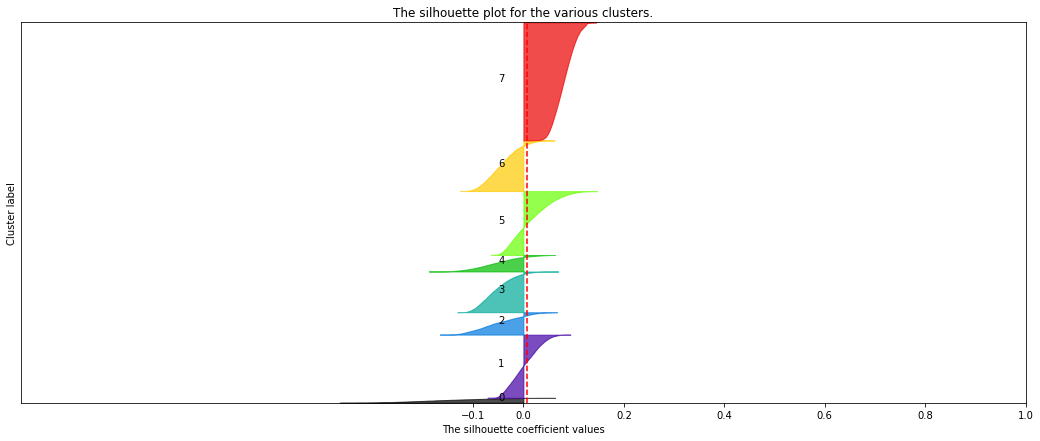

For n_clusters = 9 The average silhouette_score is : 0.0076408139337412456


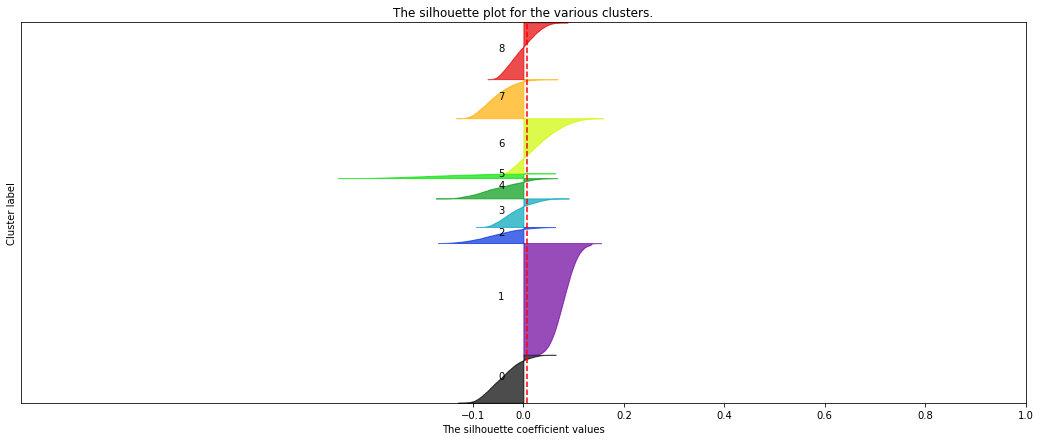

For n_clusters = 10 The average silhouette_score is : -0.005438962306164355


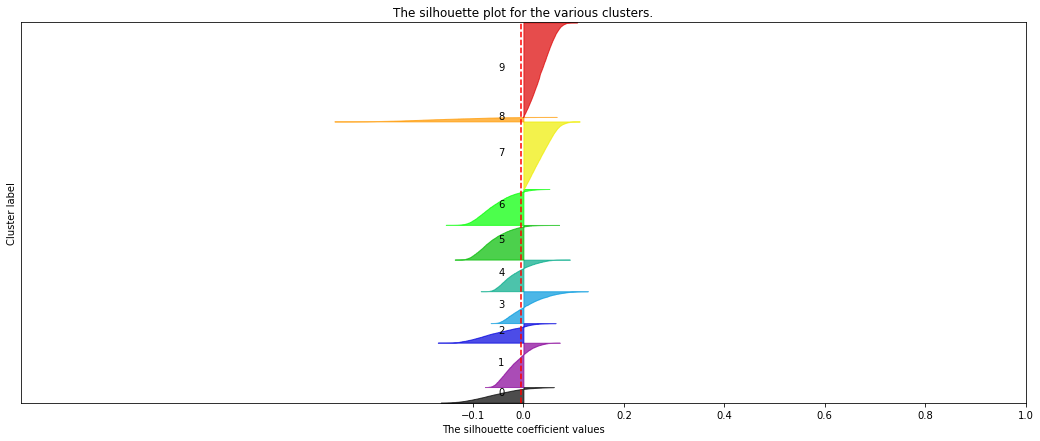

For n_clusters = 11 The average silhouette_score is : -0.007192113659487219


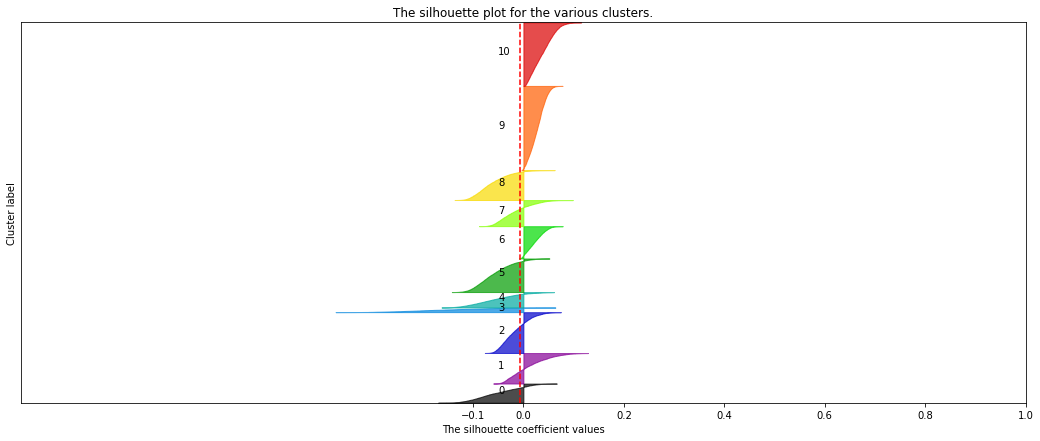

For n_clusters = 12 The average silhouette_score is : -0.005703256630916372


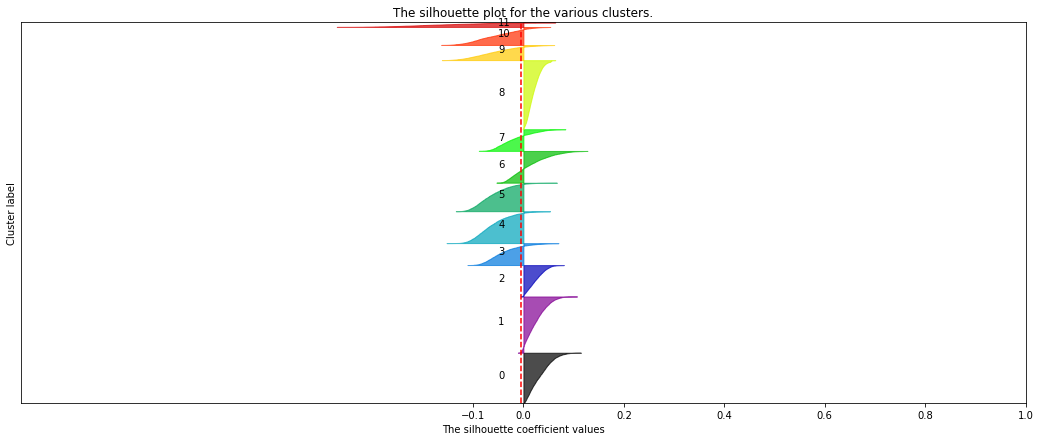

For n_clusters = 13 The average silhouette_score is : -0.00858527706201143


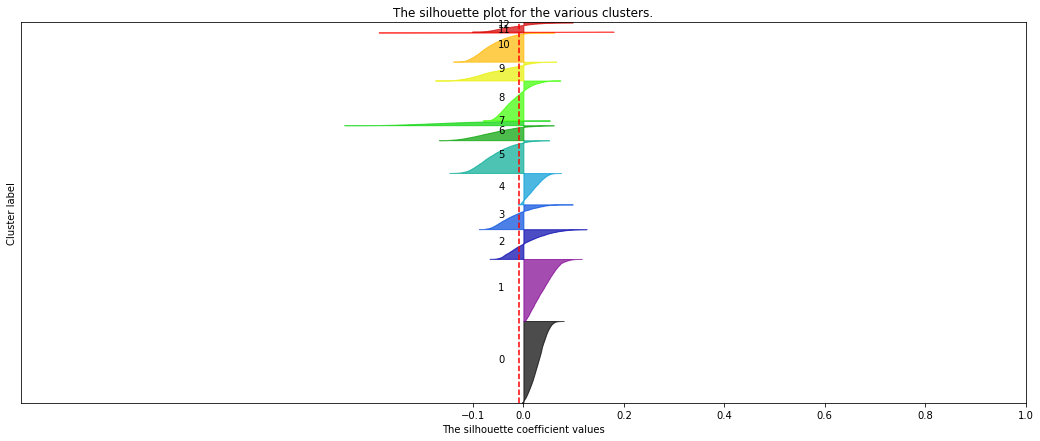

In [23]:
# Determine your k range
score = []
k_range = range(3,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

##### Subsample 1

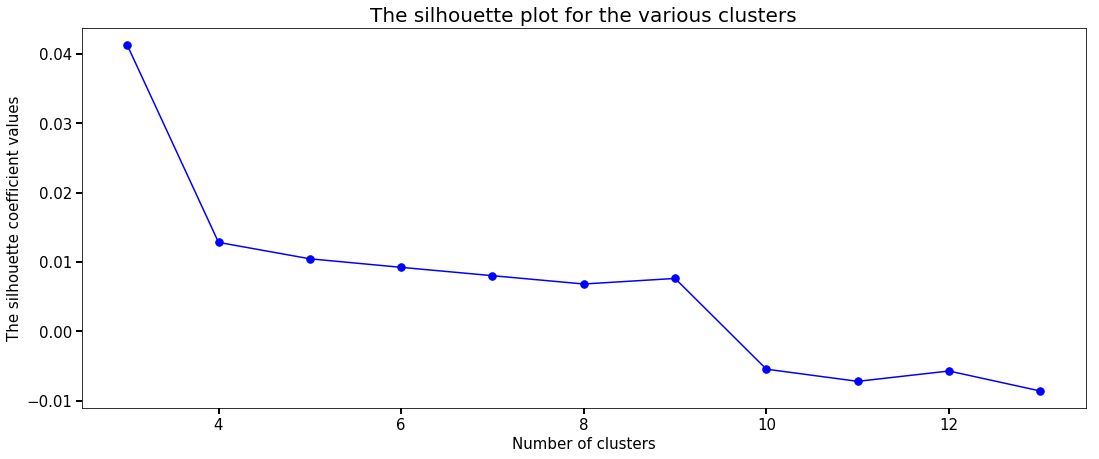

In [24]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

In [25]:
# Drop all the categoricald data for now.
df2_2 = df2_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df2_3 = df2_2.fillna(df2_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df2_3)

In [26]:
# Determine your k range
score = []
k_range = range(3,14)

for n_clusters in k_range:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.04278996117306728
For n_clusters = 4 The average silhouette_score is : 0.016342815503914088
For n_clusters = 5 The average silhouette_score is : 0.012551951626529856
For n_clusters = 6 The average silhouette_score is : 0.011450606643255857
For n_clusters = 7 The average silhouette_score is : 0.008427449979050546
For n_clusters = 8 The average silhouette_score is : 0.0038164870708317397
For n_clusters = 9 The average silhouette_score is : 0.0047093593182743615
For n_clusters = 10 The average silhouette_score is : -0.006204510895129699
For n_clusters = 11 The average silhouette_score is : -0.0062859295450745445
For n_clusters = 12 The average silhouette_score is : -0.007020396793355793
For n_clusters = 13 The average silhouette_score is : -0.007808230722948146


##### Subsample 2

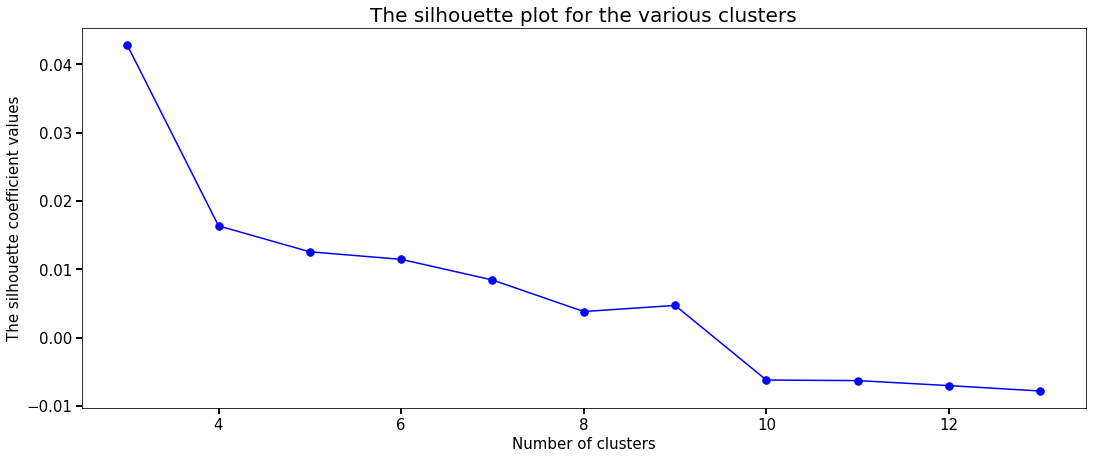

In [27]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

In [28]:
# Drop all the categoricald data for now.
df3_2 = df3_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df3_3 = df3_2.fillna(df3_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df3_3)

In [29]:
# Determine your k range
score = []
k_range = range(3,14)

for n_clusters in k_range:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.038359970909727335
For n_clusters = 4 The average silhouette_score is : 0.017071873669593663
For n_clusters = 5 The average silhouette_score is : 0.012455171890626273
For n_clusters = 6 The average silhouette_score is : 0.011907198693680567
For n_clusters = 7 The average silhouette_score is : 0.007889267953552263
For n_clusters = 8 The average silhouette_score is : 0.008745861905939362
For n_clusters = 9 The average silhouette_score is : -0.004417814484755803
For n_clusters = 10 The average silhouette_score is : -0.006323066897926256
For n_clusters = 11 The average silhouette_score is : -0.008228990260022228
For n_clusters = 12 The average silhouette_score is : -0.0016998660550976933
For n_clusters = 13 The average silhouette_score is : -0.008496963239805371


##### Subsample 3

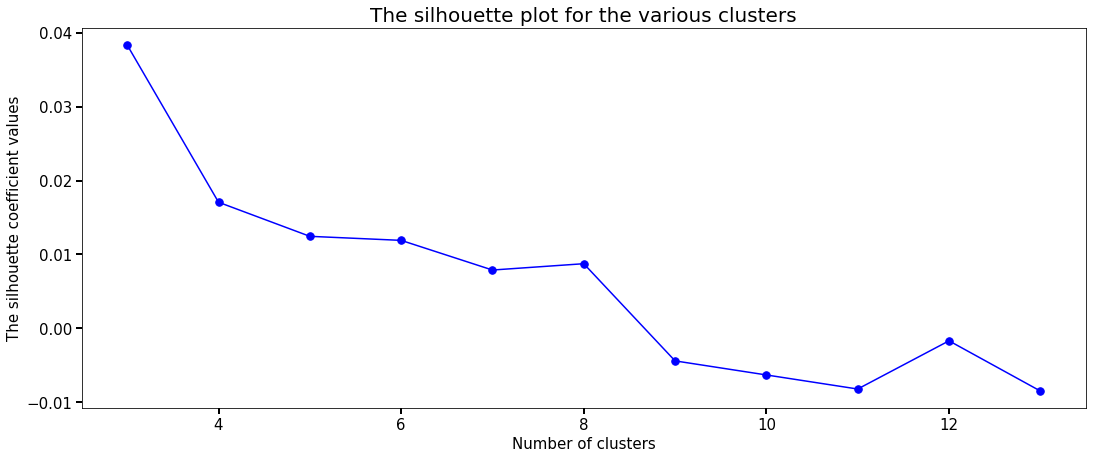

In [30]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

#### Approach III. Use PCA to reduce the original 1063 dimensions. Drop all the categorical values and impute the numerical values with means, the method will be applied on a ramdonly generated subsamples (1.25%) of the original size data.

##### Subsample 1

In [32]:
df = pd.read_csv('PHBsample14_sss.csv', low_memory=False)

In [33]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())

In [35]:
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
X = StandardScaler().fit_transform(df_reduced)

For n_clusters = 3 The average silhouette_score is : 0.562039446337285


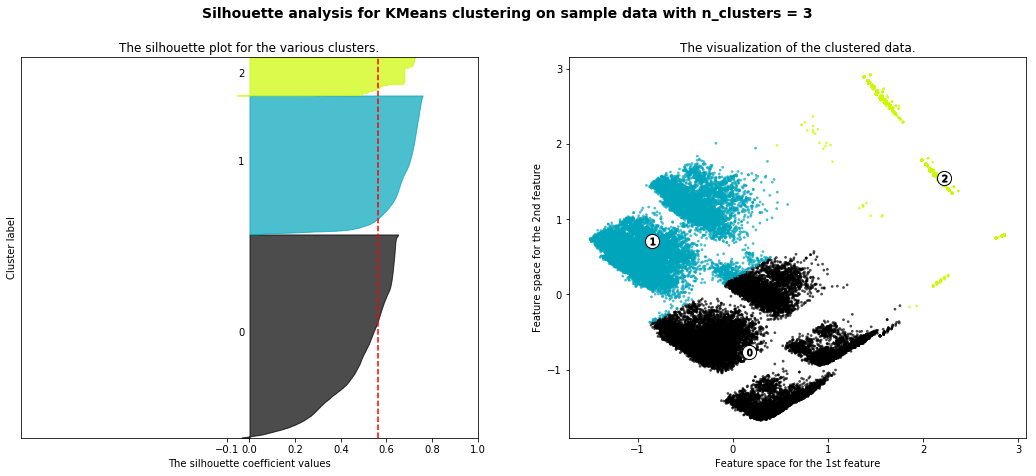

For n_clusters = 4 The average silhouette_score is : 0.5615020757414964


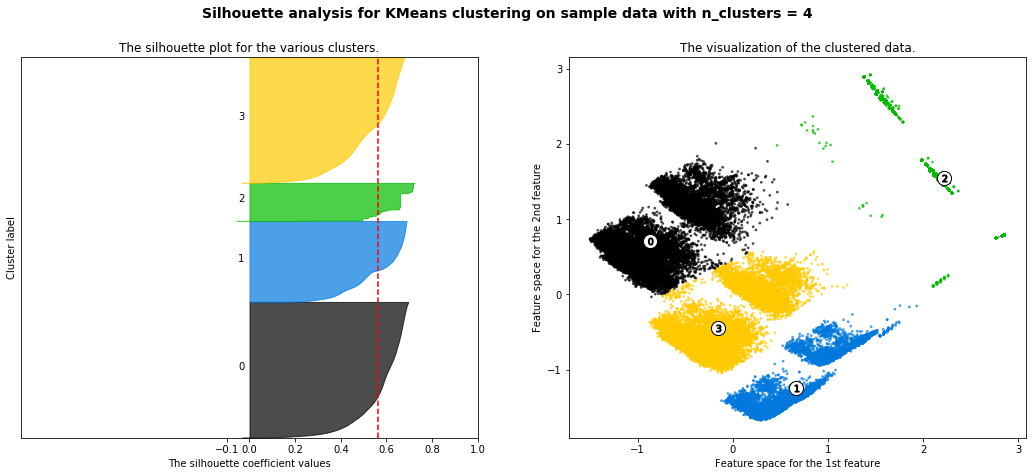

For n_clusters = 5 The average silhouette_score is : 0.5725755668640297


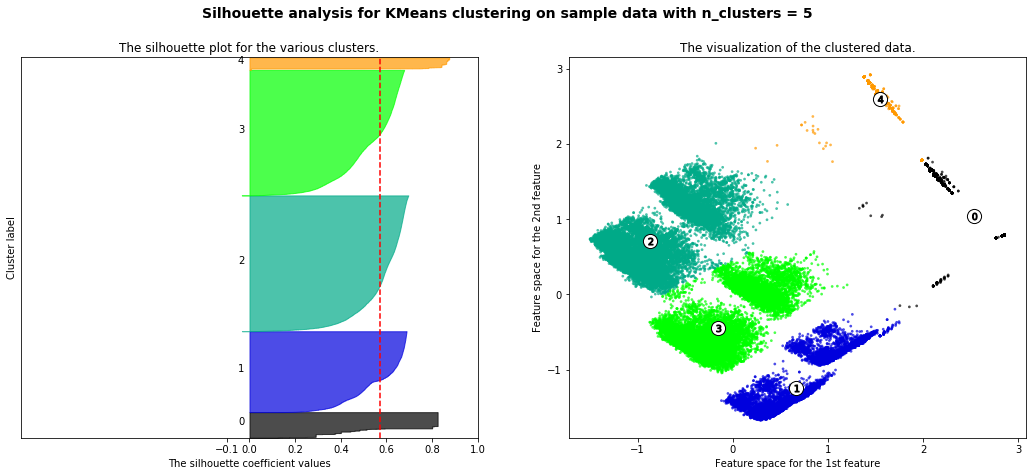

For n_clusters = 6 The average silhouette_score is : 0.5857352555317598


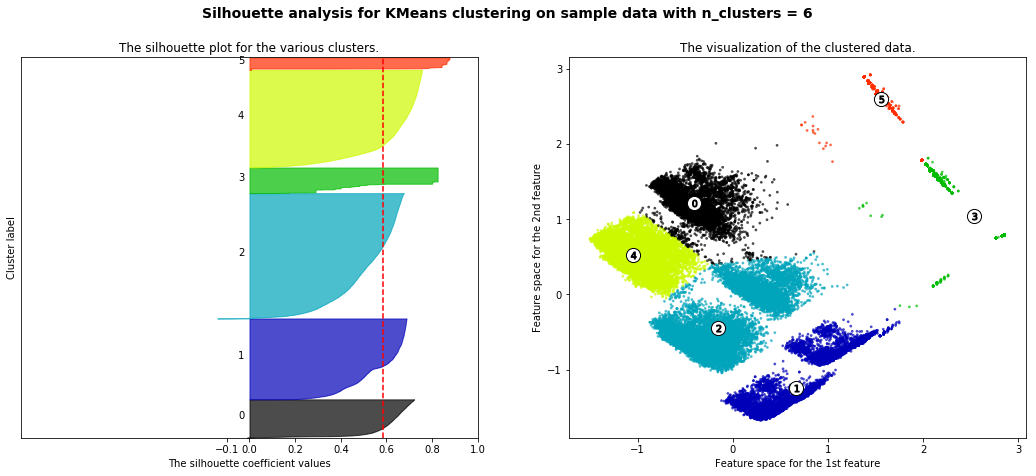

For n_clusters = 7 The average silhouette_score is : 0.6185806488183582


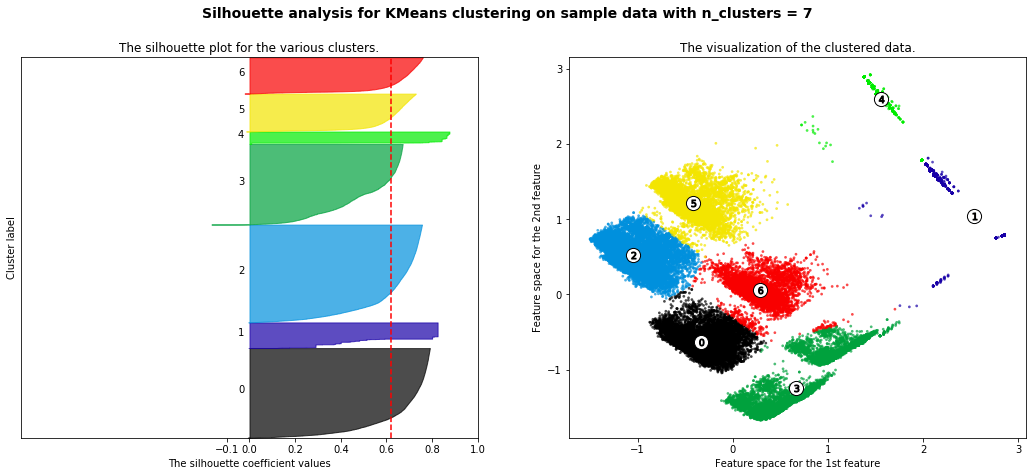

For n_clusters = 8 The average silhouette_score is : 0.6536143559522457


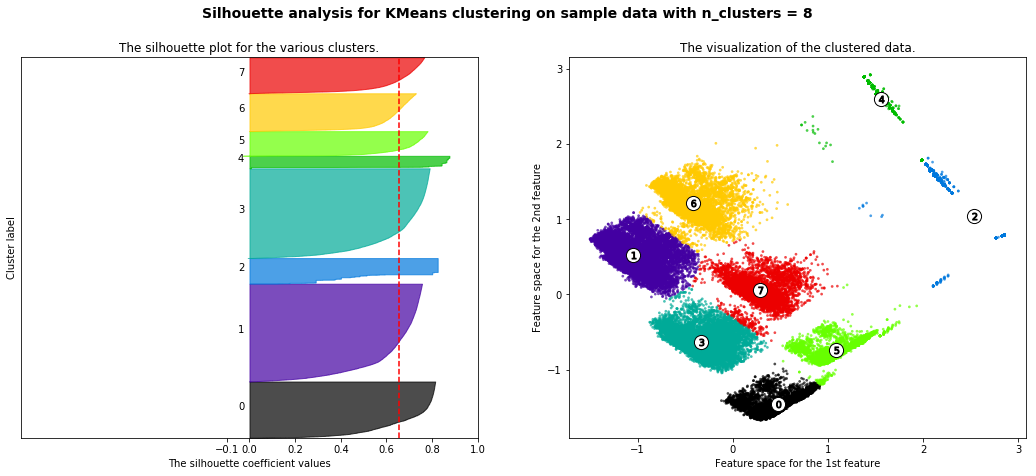

For n_clusters = 9 The average silhouette_score is : 0.6754685955657159


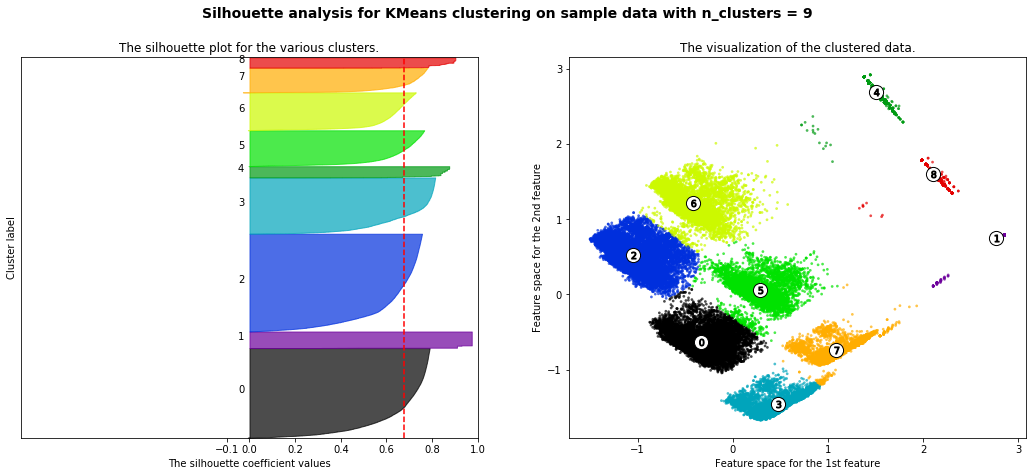

For n_clusters = 10 The average silhouette_score is : 0.6111713926125962


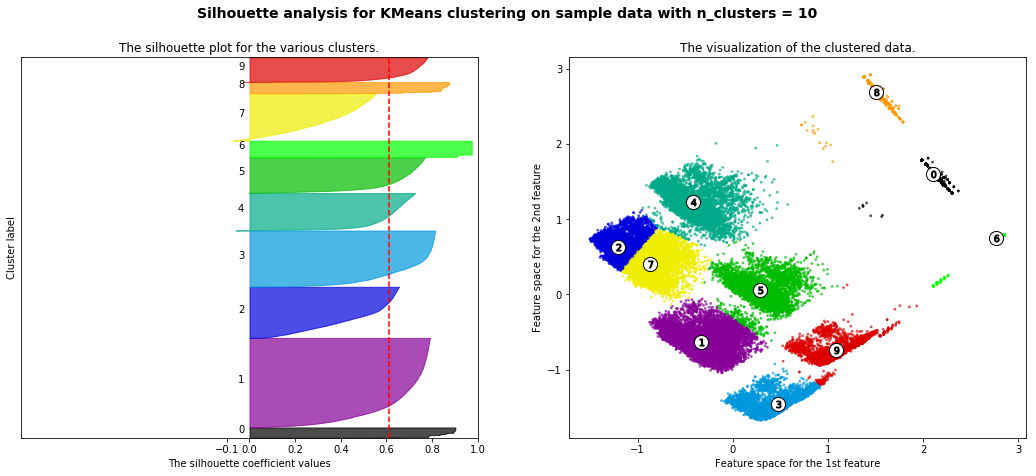

For n_clusters = 11 The average silhouette_score is : 0.5518579879323694


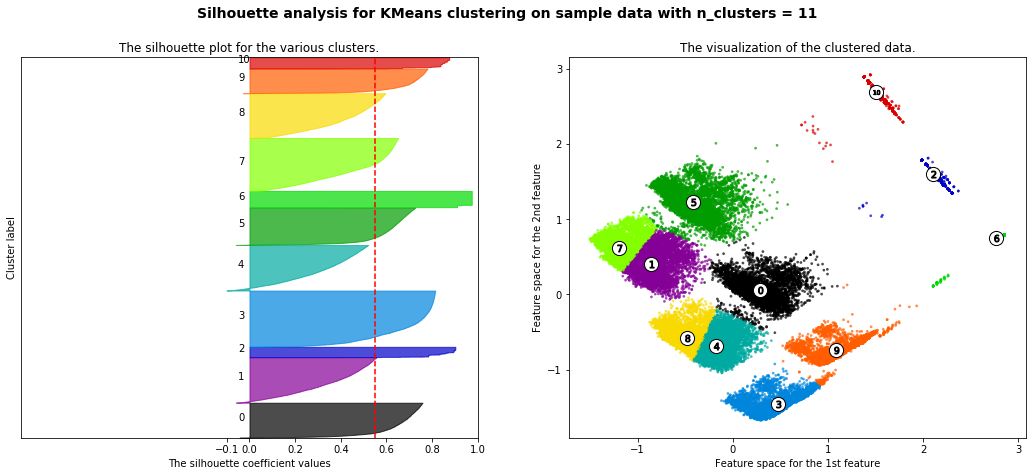

For n_clusters = 12 The average silhouette_score is : 0.503639230531837


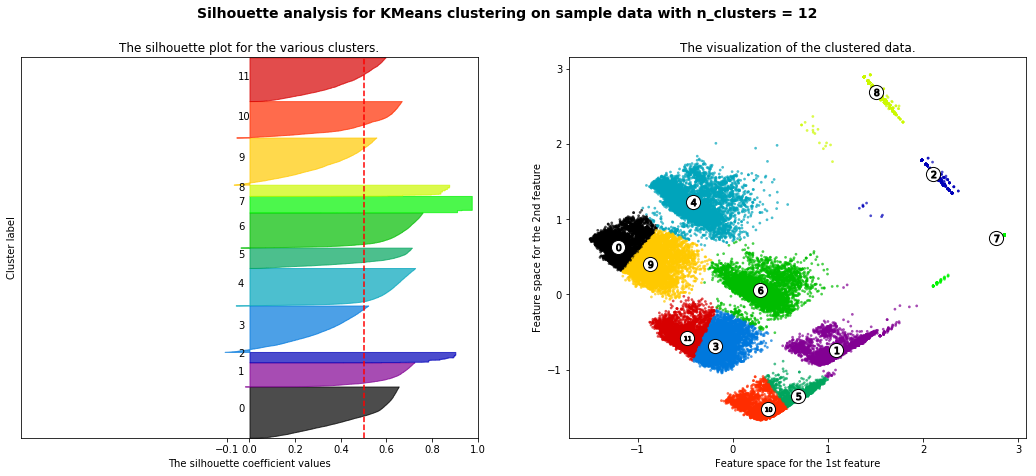

For n_clusters = 13 The average silhouette_score is : 0.48671821907691015


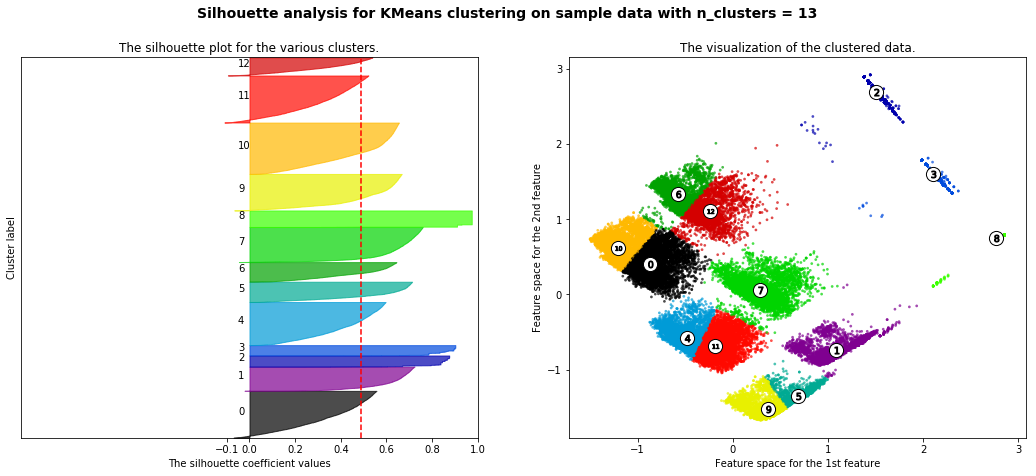

In [37]:
# Determine your k range

score = []
k_range = range(3,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig('OptimalK_silhouette'+ str(n_clusters) + '.png', dpi=100)

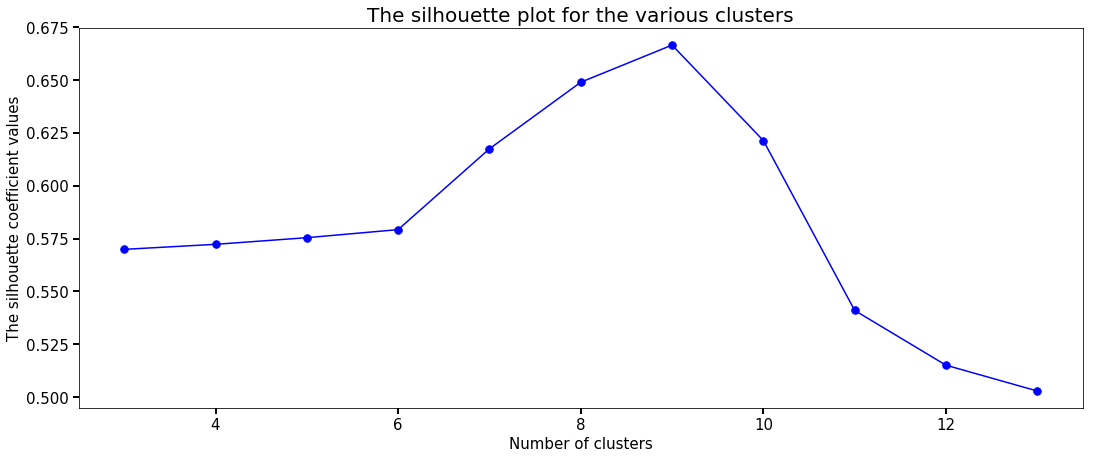

In [42]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

##### Subsample 2

In [39]:
df = pd.read_csv('PHBsample15_sss.csv', low_memory=False)

In [40]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
X = StandardScaler().fit_transform(df_reduced)

For n_clusters = 3 The average silhouette_score is : 0.5699194096197725


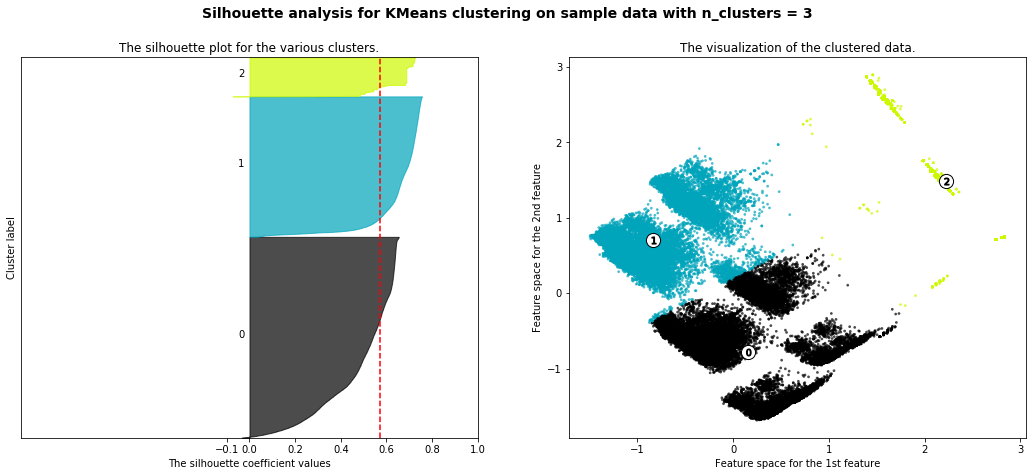

For n_clusters = 4 The average silhouette_score is : 0.5723038301083421


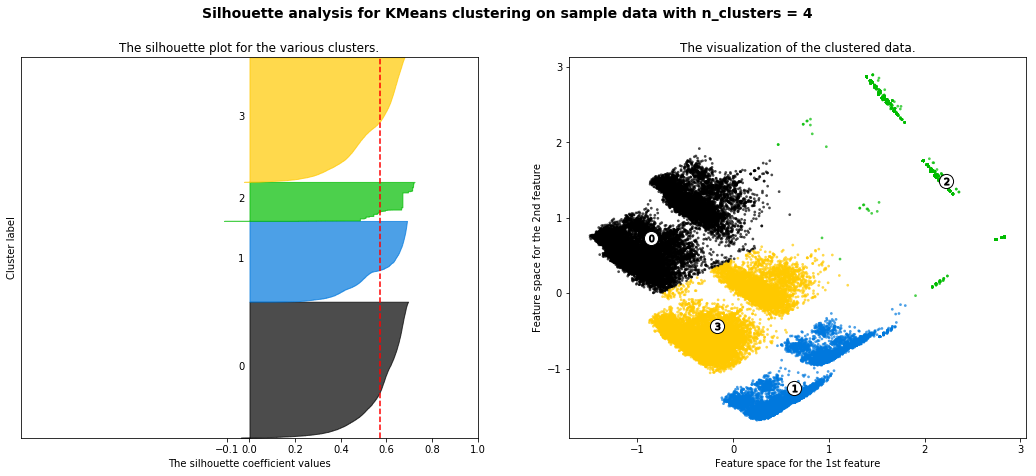

For n_clusters = 5 The average silhouette_score is : 0.575441327401031


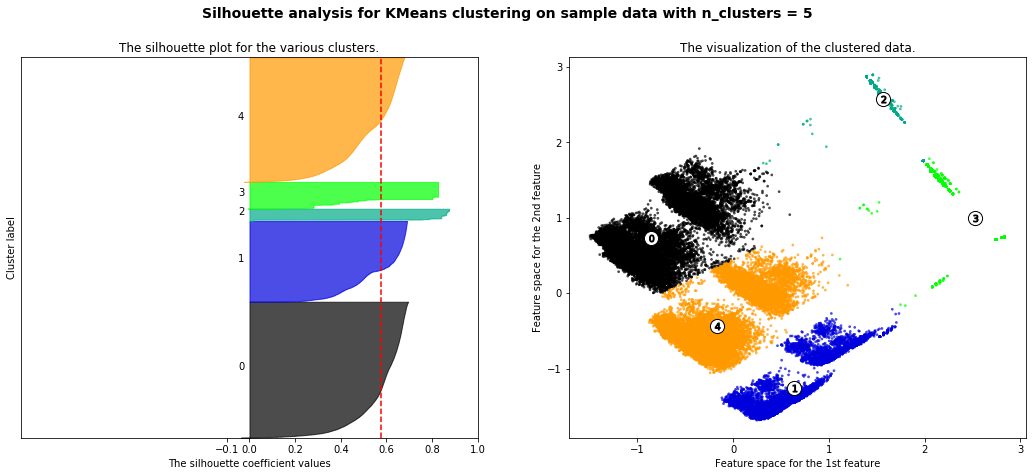

For n_clusters = 6 The average silhouette_score is : 0.5792639123887606


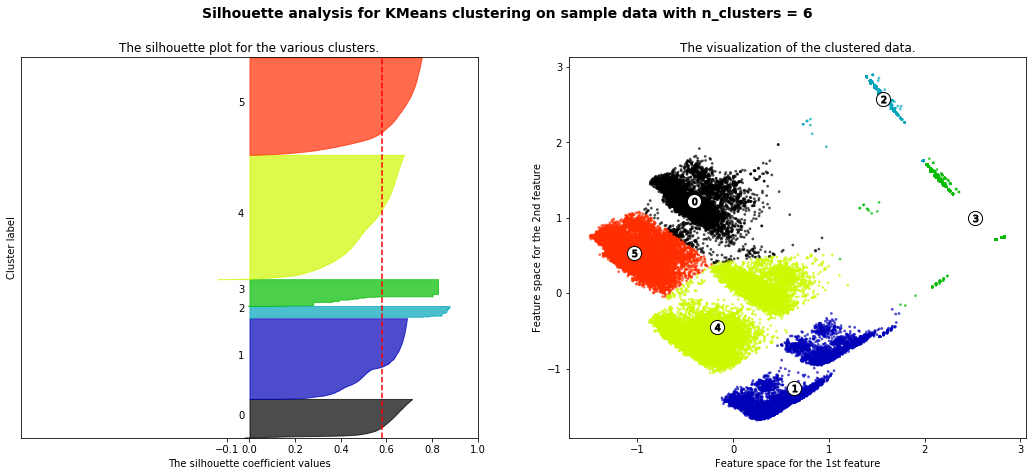

For n_clusters = 7 The average silhouette_score is : 0.6175140505358938


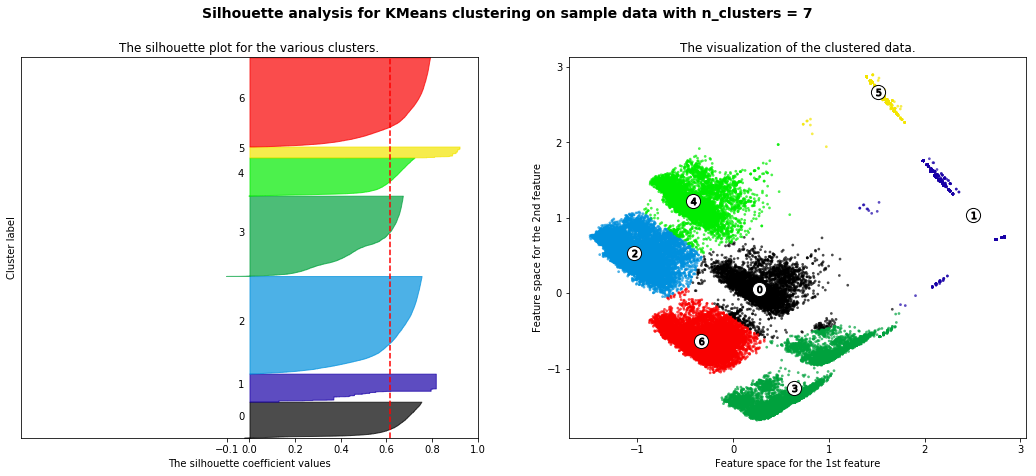

For n_clusters = 8 The average silhouette_score is : 0.6490137478000348


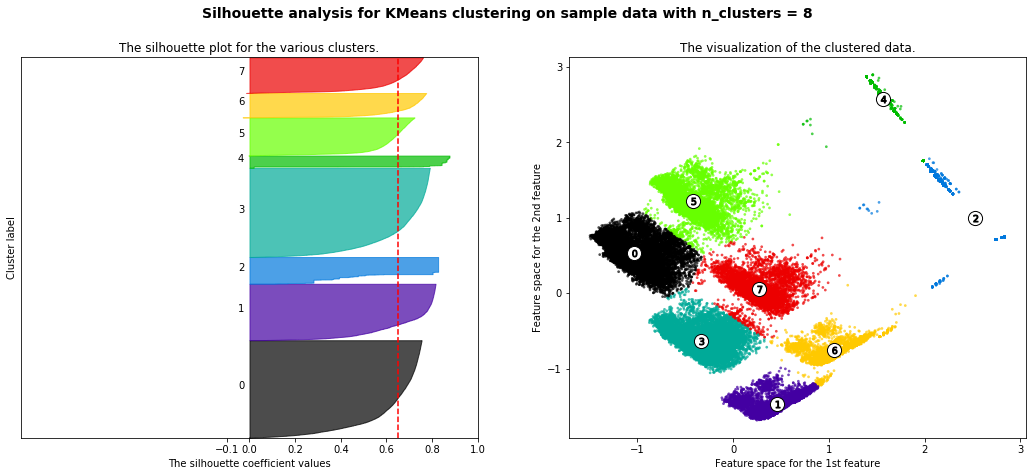

For n_clusters = 9 The average silhouette_score is : 0.6665977334401952


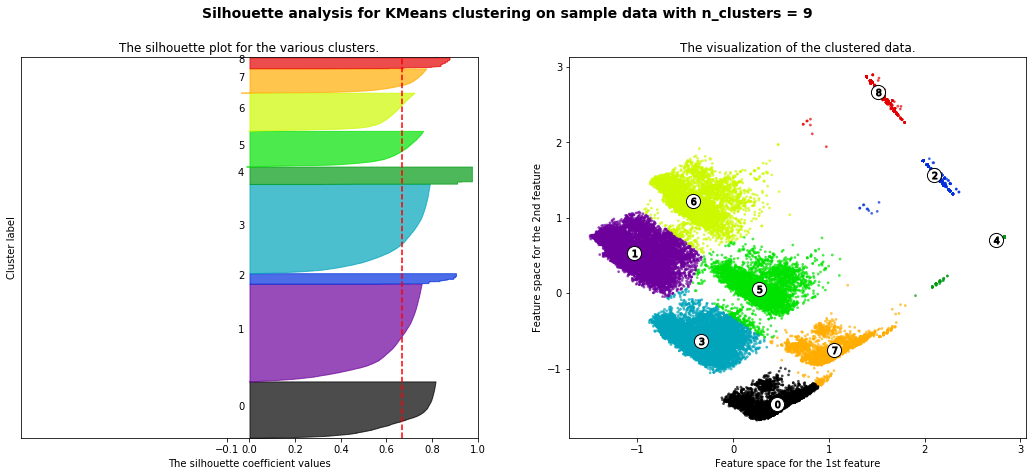

For n_clusters = 10 The average silhouette_score is : 0.6213921009524508


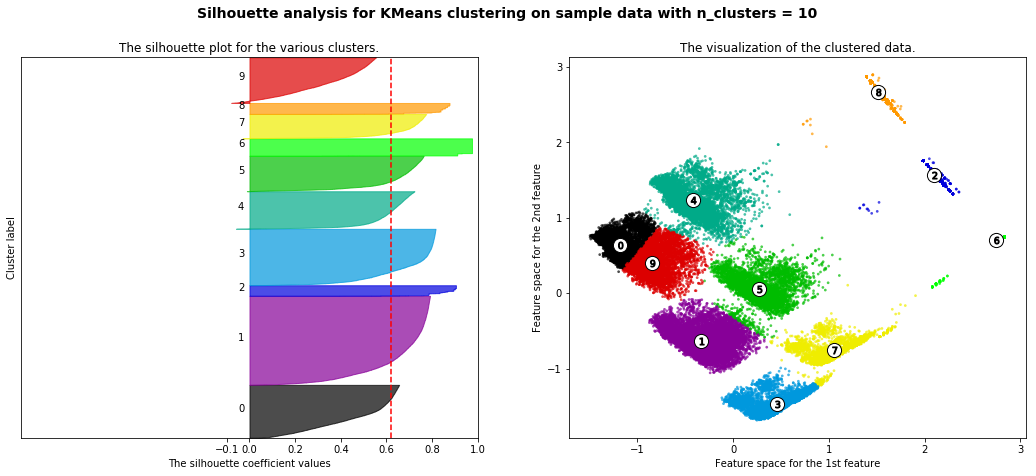

For n_clusters = 11 The average silhouette_score is : 0.5409974801251657


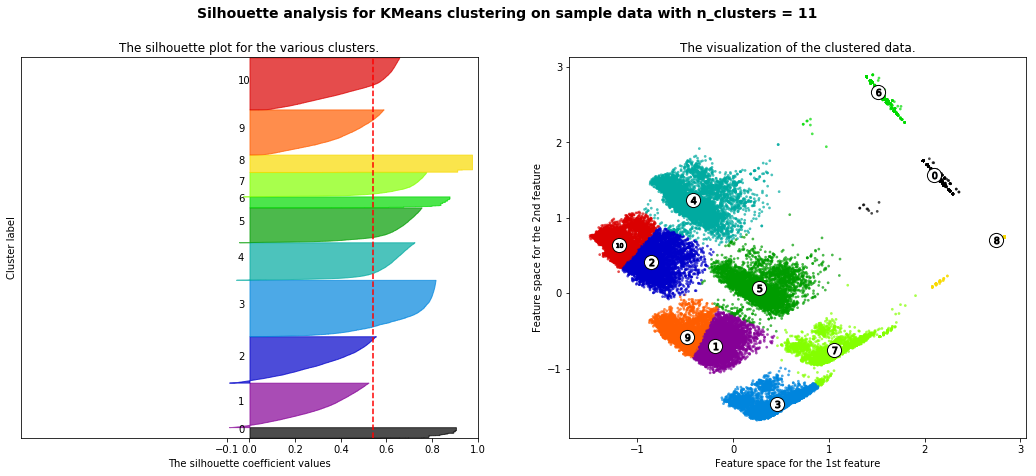

For n_clusters = 12 The average silhouette_score is : 0.5150860780740979


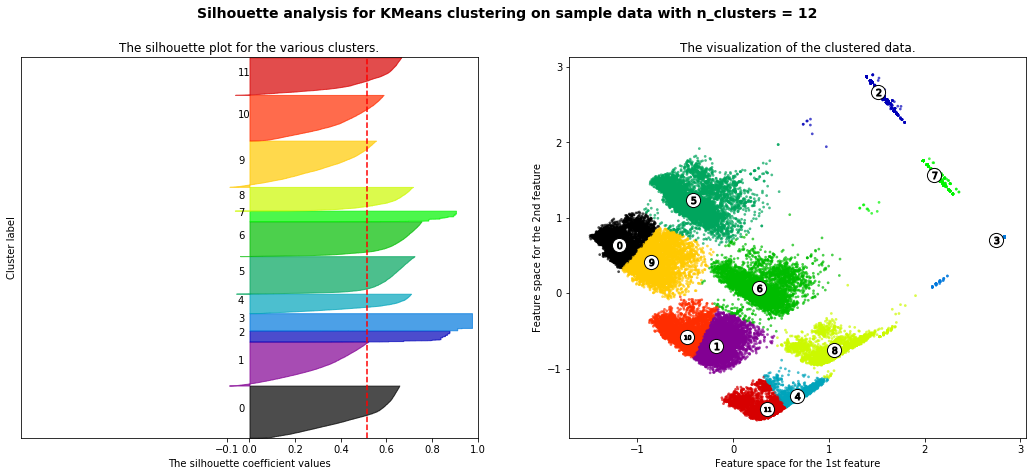

For n_clusters = 13 The average silhouette_score is : 0.5028834223703184


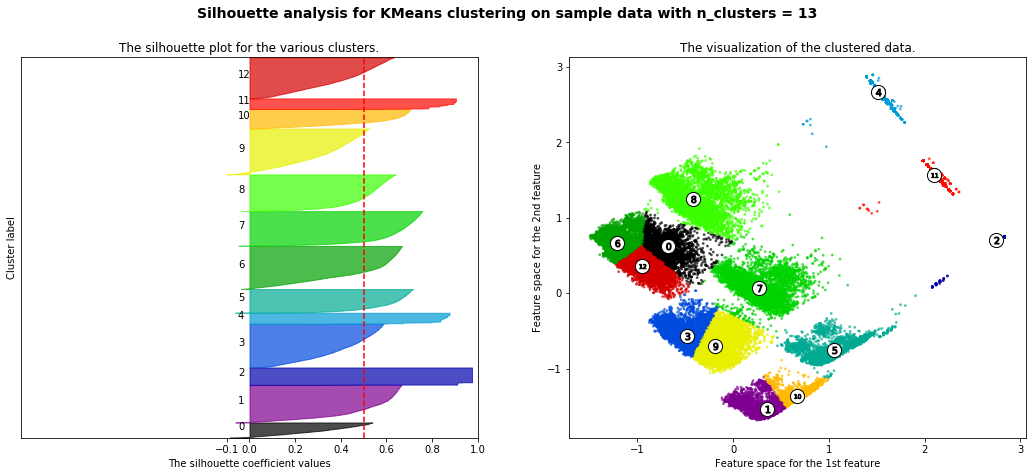

In [41]:
# Determine your k range

score = []
k_range = range(3,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig('OptimalK_silhouette'+ str(n_clusters) + '.png', dpi=100)

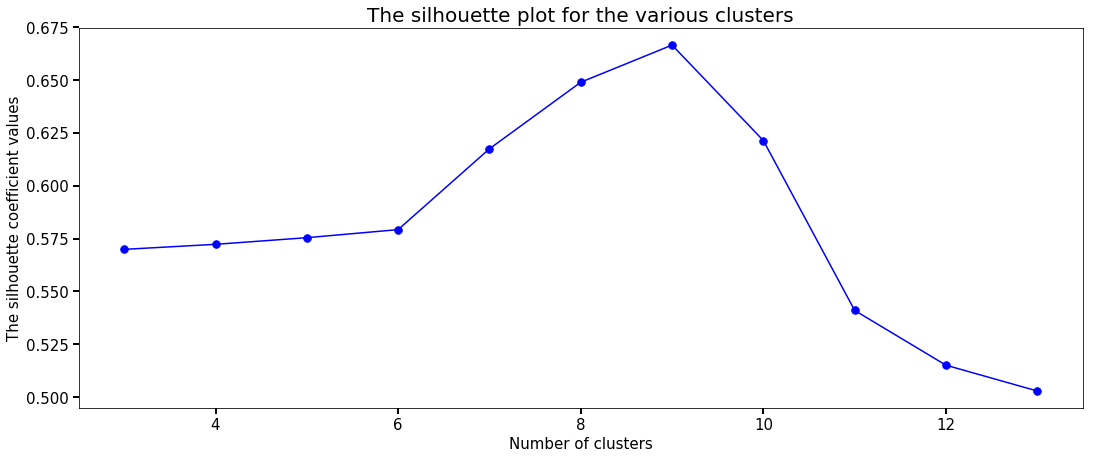

In [43]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

##### Subsample 3

In [44]:
df = pd.read_csv('PHBsample16_sss.csv', low_memory=False)

In [45]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 3 The average silhouette_score is : 0.5661495921094419


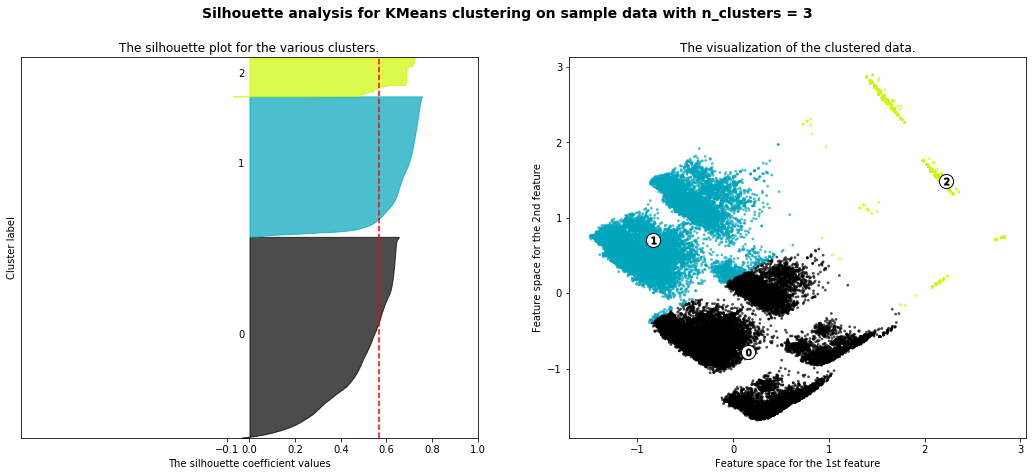

For n_clusters = 4 The average silhouette_score is : 0.5618276526461133


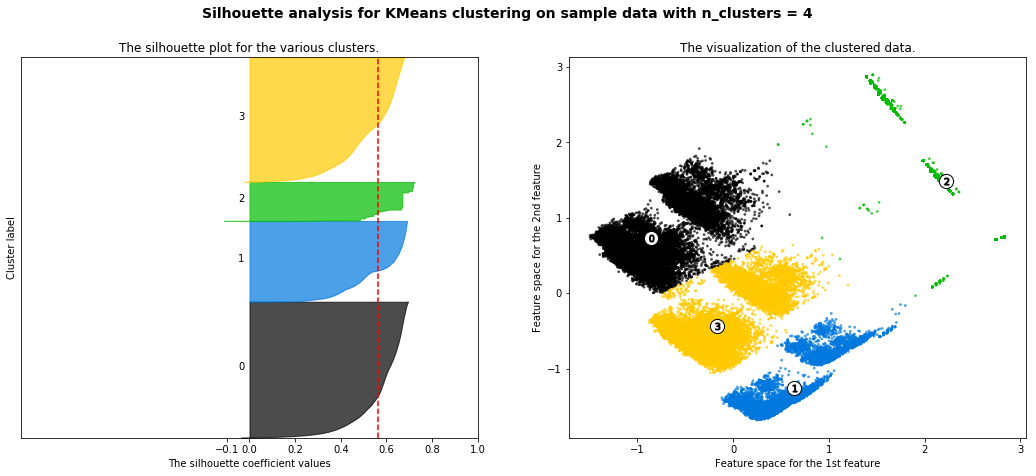

For n_clusters = 5 The average silhouette_score is : 0.5692503796233265


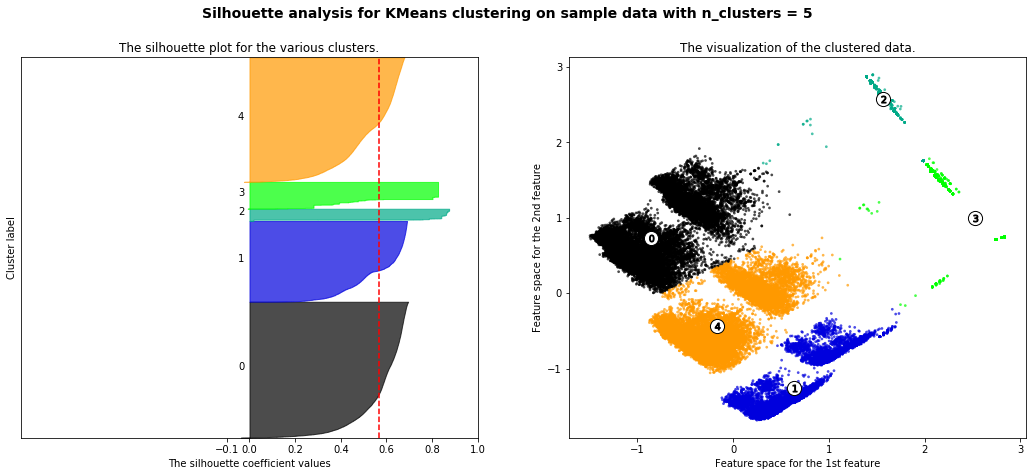

For n_clusters = 6 The average silhouette_score is : 0.5834590155006543


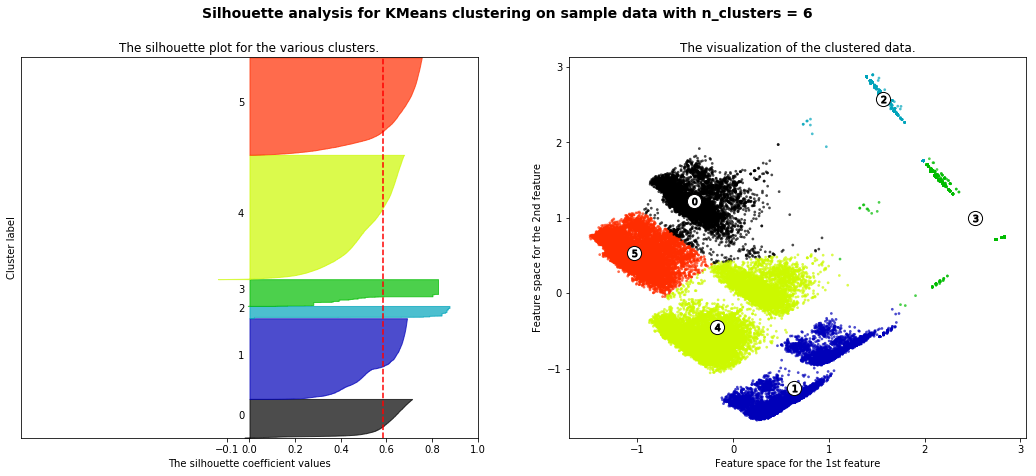

For n_clusters = 7 The average silhouette_score is : 0.6189160135561421


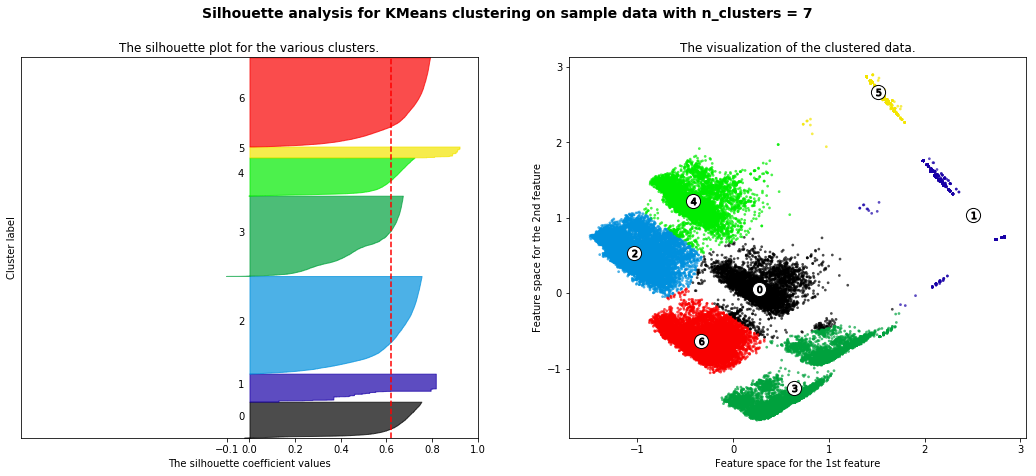

For n_clusters = 8 The average silhouette_score is : 0.6458723518132687


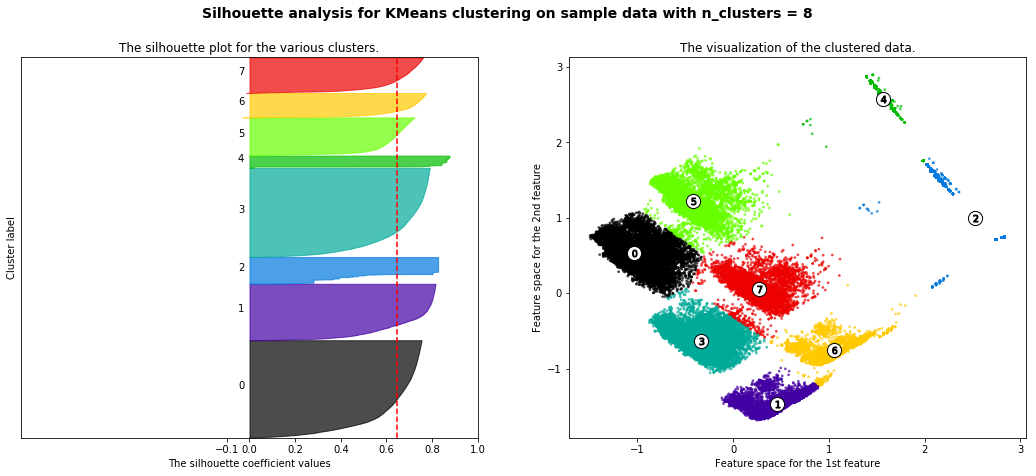

For n_clusters = 9 The average silhouette_score is : 0.6754381451449174


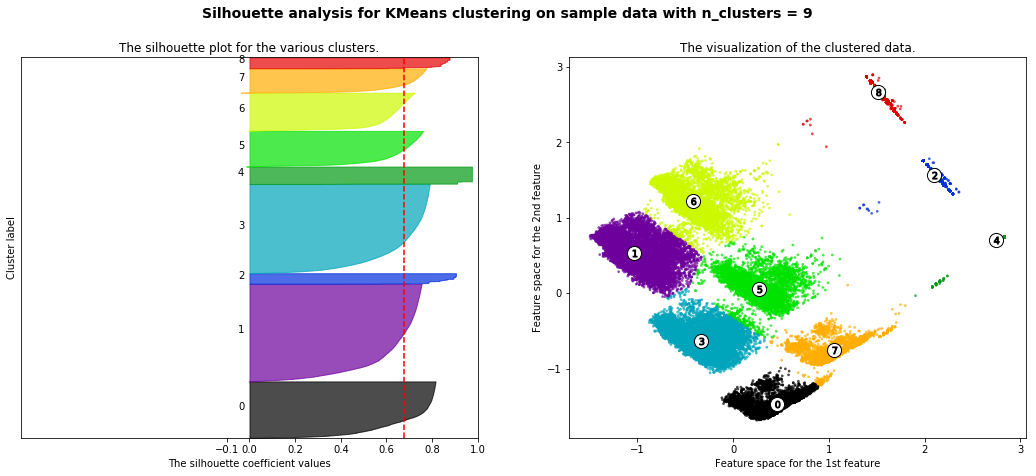

For n_clusters = 10 The average silhouette_score is : 0.6198947027358962


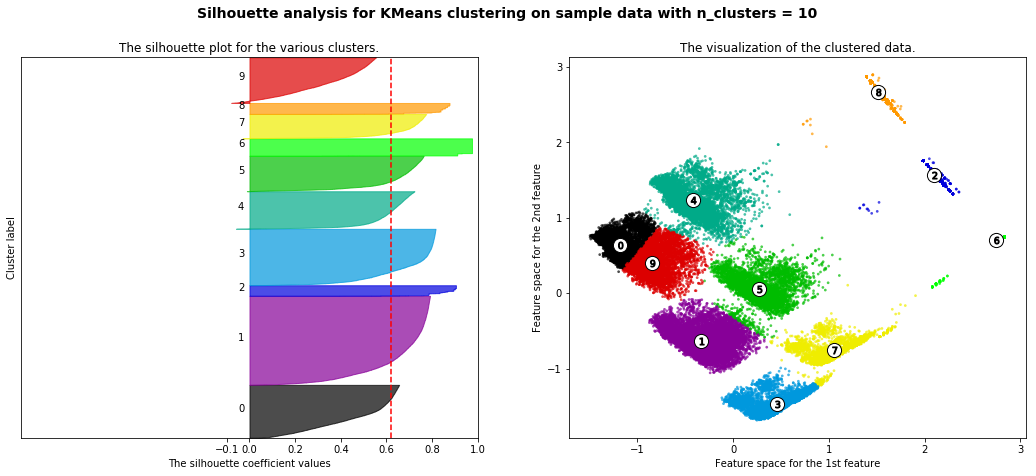

For n_clusters = 11 The average silhouette_score is : 0.543119008350154


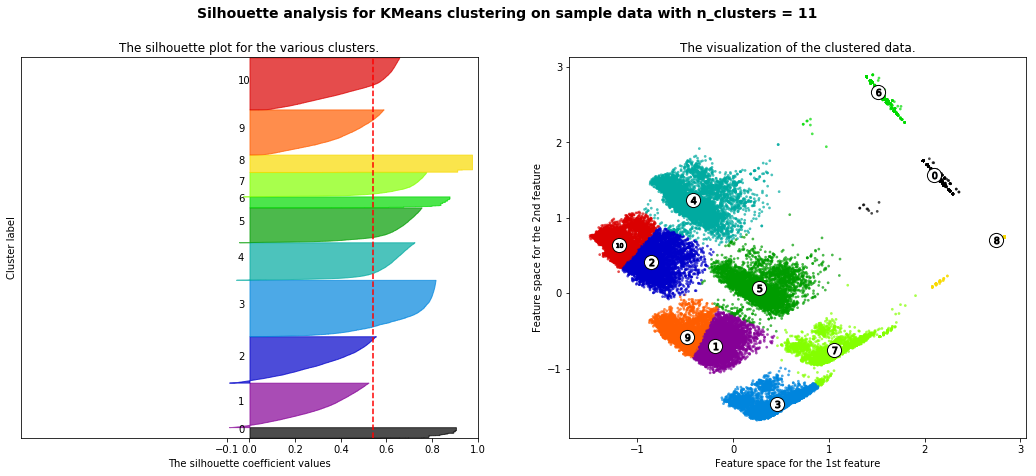

For n_clusters = 12 The average silhouette_score is : 0.5219209671045737


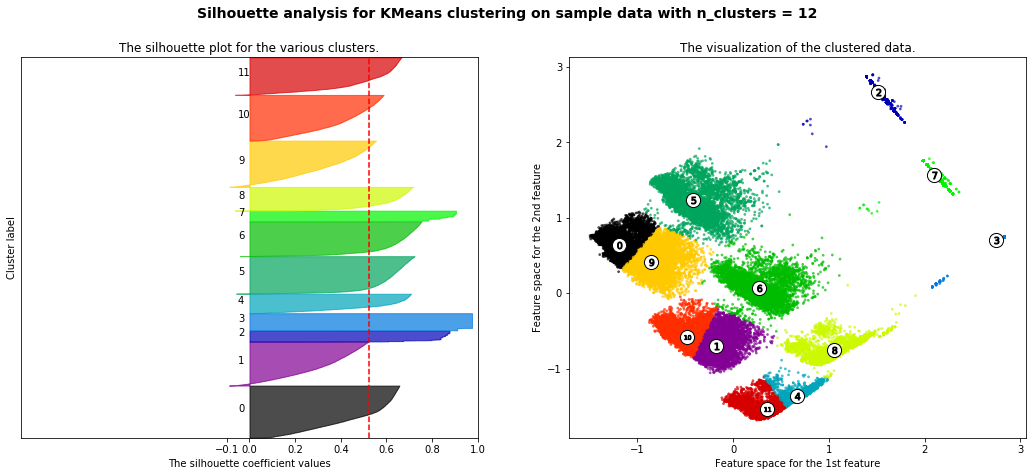

For n_clusters = 13 The average silhouette_score is : 0.49939787804094626


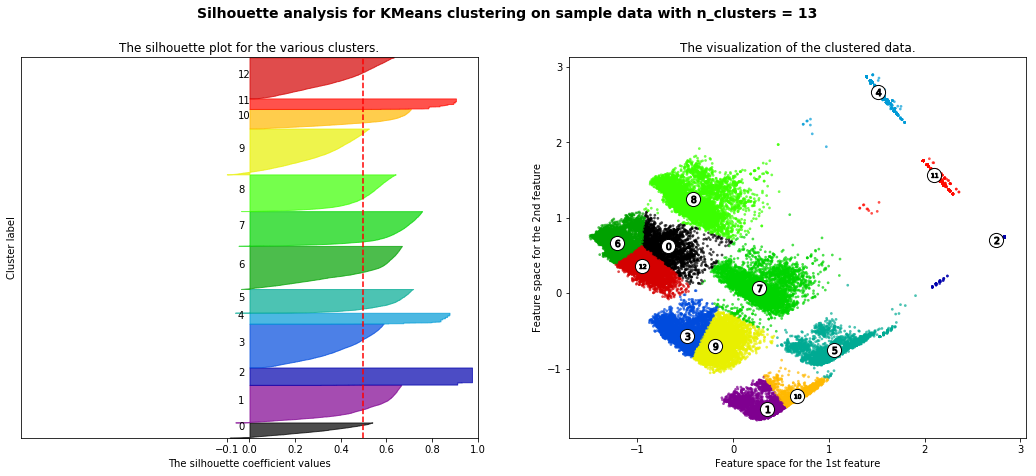

In [46]:
# Determine your k range

score = []
k_range = range(3,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig('OptimalK_silhouette'+ str(n_clusters) + '.png', dpi=100)

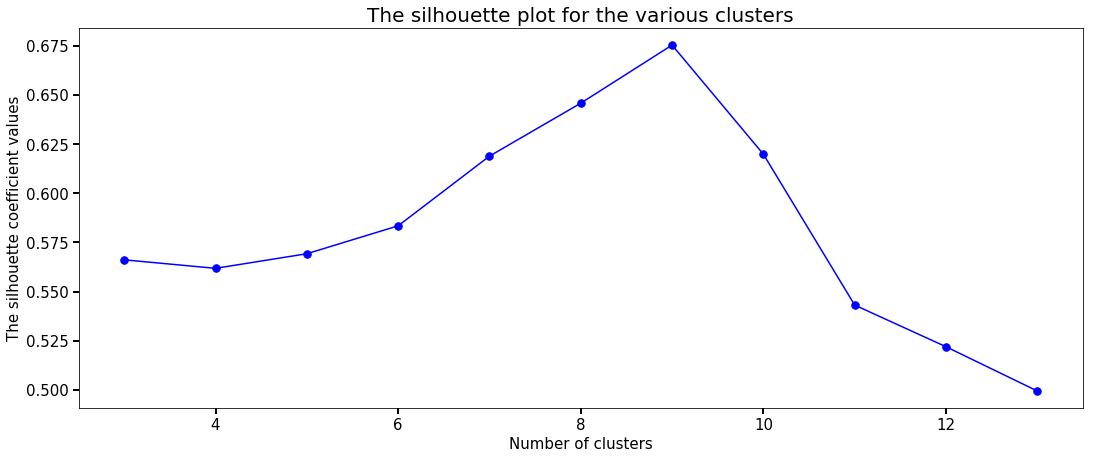

In [47]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

#### Approach IV 514 features were selected out of the 1063 features. Then use LASSO and PCA to contidue reduce dimension to 44 variables (all of them turned out to be numerical variables). Impute NA with means.

In [50]:
df = pd.read_csv('/mnt/UW/outputDataset/pca_reduced_LASSO.csv')

In [51]:
df.shape

(4732698, 44)

In [54]:
df = df.fillna(df.mean())

In [55]:
X = StandardScaler().fit_transform(df)

In [58]:
# Determine your k range

score = []
k_range = range(3,14)

for n_clusters in k_range:
      
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     
        
    

For n_clusters = 3 The average silhouette_score is : 0.08224632055651296
For n_clusters = 4 The average silhouette_score is : 0.06745713703217426
For n_clusters = 5 The average silhouette_score is : 0.028170627030218023
For n_clusters = 6 The average silhouette_score is : 0.03214873831310112
For n_clusters = 7 The average silhouette_score is : 0.03276519748186334
For n_clusters = 8 The average silhouette_score is : 0.0322538778445412
For n_clusters = 9 The average silhouette_score is : 0.019705764949117494
For n_clusters = 10 The average silhouette_score is : 0.028429184081513383
For n_clusters = 11 The average silhouette_score is : 0.01818422612947045
For n_clusters = 12 The average silhouette_score is : 0.018812471672766434
For n_clusters = 13 The average silhouette_score is : 0.01780576841174696


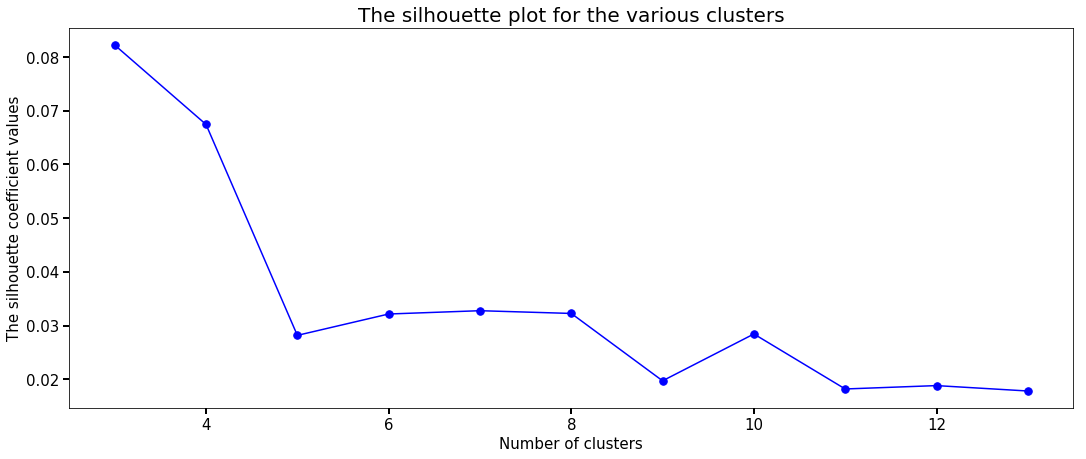

In [59]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')